# Forward Feature selection

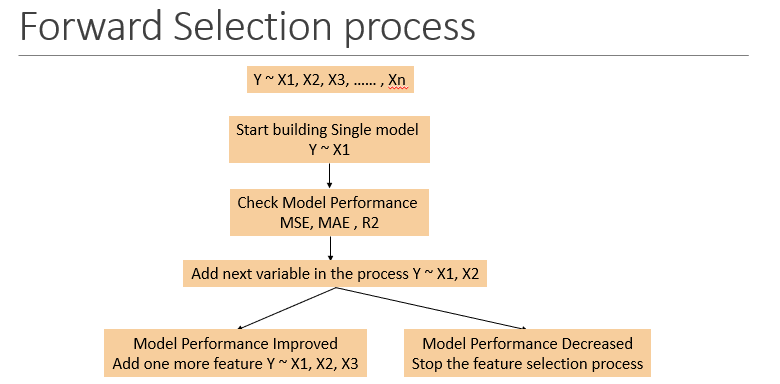

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1: read the dataset

In [5]:
import pandas as pd 
df = pd.read_csv("Cars93.csv", na_values=["", "NA"], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


### Step 2 - Perform Basic Data quality checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [7]:
m = df.isna().sum()
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### Step 3: Seperate X and Y(Weight)
drop id columns

In [9]:
X = df.drop(columns=["id", "Weight"])
Y = df[["Weight"]]

In [10]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [11]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Step 3: Feaature Selection Pipeline

In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [14]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [15]:
# Feature selection pipeline only
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer 

In [17]:
num_pipe1 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [18]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
)

In [20]:
pre1 = ColumnTransformer([
    ("num", num_pipe1, con),
    ("cat", cat_pipe1, cat)
]).set_output(transform="pandas")

In [22]:
X_pre1 = pre1.fit_transform(X)
X_pre1.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Luggage.room,cat__Manufacturer,cat__Model,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin,cat__Make
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-1.033015,0.0,48.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.396643,0.0,55.0,2.0,0.0,1.0,3.0,1.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.039228,1.0,8.0,0.0,1.0,1.0,3.0,1.0,1.0,3.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,1.111472,1.0,0.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,-0.318186,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,4.0


In [23]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Min.Price', 'Price', 'Max.Price', 'MPG.city',
                                  'MPG.highway', 'EngineSize', 'Horsepower',
                                  'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
                                  'Passengers', 'Length', 'Wheelbase', 'Width',
                                  'Turn.circle', 'Rear.seat.room',
                                  'Luggage.room']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Manufacturer', 'Model', 'Type', 'AirBags',
                                  'DriveTrain', 'Cylinders', 'Man.trans.avail',
                                  'Origin', 'Make'])])

### Feature selection

In [26]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [30]:
sel = SequentialFeatureSelector(
    estimator=LinearRegression(), direction="forward", n_features_to_select="auto"
)
sel.fit(X_pre1, Y)

SequentialFeatureSelector(estimator=LinearRegression())

In [32]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'num__Width', 'num__Rear.seat.room',
       'cat__Manufacturer', 'cat__Type', 'cat__Cylinders', 'cat__Origin'],
      dtype=object)

In [33]:
len(sel.get_feature_names_out())

13

In [34]:
sel_cols[0]

'num__MPG.highway'

In [36]:
sel_cols[0].split("__")[1]

'MPG.highway'

In [37]:
imp_cols = [col.split("__")[1] for col in sel_cols]
imp_cols

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Rear.seat.room',
 'Manufacturer',
 'Type',
 'Cylinders',
 'Origin']

In [39]:
X_sel = X[imp_cols]

In [41]:
X_sel.head()

,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Rear.seat.room,Manufacturer,Type,Cylinders,Origin
0,31,140,6300,13.2,5,177,102,68,26.5,Acura,Small,4,non-USA
1,25,200,5500,18.0,5,195,115,71,30.0,Acura,Midsize,6,non-USA
2,26,172,5500,16.9,5,180,102,67,28.0,Audi,Compact,6,non-USA
3,26,172,5500,21.1,6,193,106,70,31.0,Audi,Midsize,6,non-USA
4,30,208,5700,21.1,4,186,109,69,27.0,BMW,Midsize,4,non-USA


### Step 4: Create a final preprocessing pipeline

In [43]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])

In [44]:
cat_sel

['Manufacturer', 'Type', 'Cylinders', 'Origin']

In [45]:
con_sel

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Rear.seat.room']

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [48]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [49]:
pre2 = ColumnTransformer([
    ("num", num_pipe2, con_sel),
    ("cat", cat_pipe2, cat_sel)
]).set_output(transform="pandas")

In [50]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.452197,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,0.431983,0.738090,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,0.057926,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,0.165927,1.078172,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,-0.100128,-0.282156,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers', 'Length',
                                  'Wheelbase', 'Width', 'Rear.seat.room']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Type', 'Cylinders',
                                  'Origin'])])

### Step 5: Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X_sel_pre, Y, test_size=0.2, random_state=21
)

In [54]:
xtrain.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
57,-0.016221,-0.265452,-0.304365,-0.663618,-0.083243,-0.564892,0.155356,-0.632239,-0.622238,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31,0.172352,-0.323043,2.054464,-1.062184,-0.083243,-0.840305,-0.876650,-0.632239,0.057926,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
62,-0.959087,1.116716,1.212025,0.716035,-0.083243,0.467905,0.450214,0.165927,-0.112115,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29,-0.204794,1.347077,0.875050,0.409445,0.884457,1.294143,1.334791,1.230149,0.738090,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51,-0.581941,1.270290,-1.146804,1.022624,0.884457,2.464647,1.924508,2.028316,1.248213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [55]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [56]:
xtest.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
23,-0.016221,-0.975733,-0.809828,-0.816912,-0.083243,-0.771452,-1.024079,-0.632239,-0.452197,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
86,-1.336233,-0.111878,-0.472853,0.961306,1.852158,0.261346,1.334791,0.431983,2.438501,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
91,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.467905,0.007926,-0.632239,0.568049,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
21,-0.581941,0.060893,-0.809828,-0.203734,0.884457,1.362996,0.892502,-0.100128,2.778583,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17,-0.581941,0.502419,-1.820755,1.942392,0.884457,2.120381,1.777079,2.028316,0.568049,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [57]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [58]:
xtrain.shape

(74, 55)

In [59]:
xtest.shape

(19, 55)

### Step 6: Build the model

In [60]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [61]:
model.intercept_

array([3083.50357842])

In [62]:
model.coef_

array([[-8.65301977e+01,  2.27424665e+02, -6.65808336e+01,
        -1.60190450e+01,  3.86626933e+01,  7.70217587e+01,
         1.88796217e+02,  1.32740263e+02, -5.60694469e+01,
        -1.80839506e+02,  2.95739311e+02,  1.56907579e+02,
        -4.21136810e+01, -7.83162424e+01, -2.37892800e+01,
         3.69482223e-13,  8.07499781e+01,  8.69439418e+01,
        -1.43010438e+02, -1.07875796e+01,  4.31996669e+00,
        -3.67434176e+01, -9.39625114e+00, -6.60924537e-01,
        -4.44754726e+00,  7.54530771e+01, -6.50714247e+01,
        -1.31727110e+02, -2.57538534e+01,  4.18200787e+00,
         6.07427963e+01, -4.96522615e+01,  1.50676713e+02,
        -2.35267440e+01, -1.26604884e+02, -5.75805930e+01,
         1.01231940e+02,  2.48689958e-14, -6.30286930e+01,
         9.33790390e+01, -3.72759192e+01, -2.13057441e+01,
        -4.71490455e+01, -2.48621361e+00, -2.71009512e+01,
        -4.65583608e+01,  1.44600315e+02,  9.68841012e+01,
         2.75552979e+01,  1.57720671e+02, -2.96751013e+0

In [63]:
coef = pd.Series(model.coef_.flatten(), index=xtrain.columns)
coef

num__MPG.highway                  -8.653020e+01
num__Horsepower                    2.274247e+02
num__RPM                          -6.658083e+01
num__Fuel.tank.capacity           -1.601904e+01
num__Passengers                    3.866269e+01
num__Length                        7.702176e+01
num__Wheelbase                     1.887962e+02
num__Width                         1.327403e+02
num__Rear.seat.room               -5.606945e+01
cat__Manufacturer_Acura           -1.808395e+02
cat__Manufacturer_Audi             2.957393e+02
cat__Manufacturer_BMW              1.569076e+02
cat__Manufacturer_Buick           -4.211368e+01
cat__Manufacturer_Cadillac        -7.831624e+01
cat__Manufacturer_Chevrolet       -2.378928e+01
cat__Manufacturer_Chrylser         3.694822e-13
cat__Manufacturer_Chrysler         8.074998e+01
cat__Manufacturer_Dodge            8.694394e+01
cat__Manufacturer_Eagle           -1.430104e+02
cat__Manufacturer_Ford            -1.078758e+01
cat__Manufacturer_Geo              4.319

In [69]:
top10 = coef.sort_values(ascending=False).head(10)
top10

cat__Manufacturer_Audi        295.739311
num__Horsepower               227.424665
num__Wheelbase                188.796217
cat__Cylinders_5              157.720671
cat__Manufacturer_BMW         156.907579
cat__Manufacturer_Plymouth    150.676713
cat__Type_Van                 144.600315
num__Width                    132.740263
cat__Manufacturer_Subaru      101.231940
cat__Cylinders_3               96.884101
dtype: float64

<Axes: >

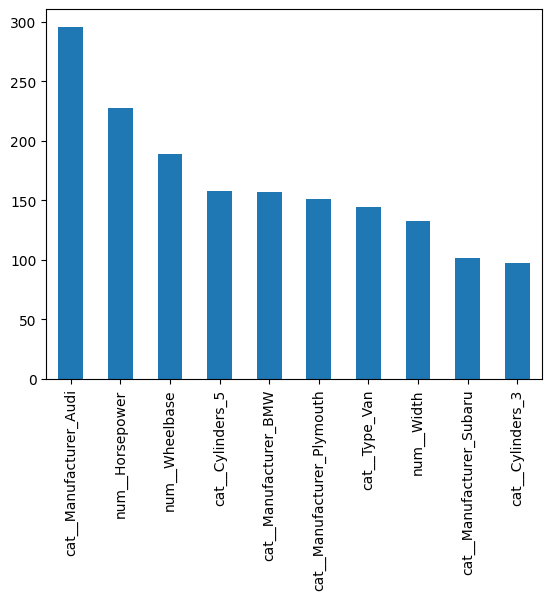

In [70]:
top10.plot(kind='bar')

In [71]:
bottom10 = coef.sort_values().head(10)
bottom10

cat__Manufacturer_Acura           -180.839506
cat__Manufacturer_Eagle           -143.010438
cat__Cylinders_8                  -141.299305
cat__Manufacturer_Mercedes-Benz   -131.727110
cat__Manufacturer_Saab            -126.604884
cat__Cylinders_rotary             -111.185664
num__MPG.highway                   -86.530198
cat__Manufacturer_Cadillac         -78.316242
num__RPM                           -66.580834
cat__Manufacturer_Mazda            -65.071425
dtype: float64

<Axes: >

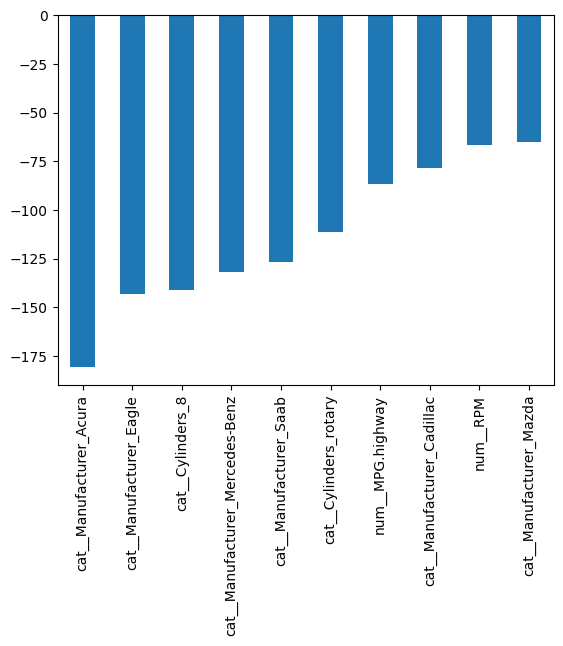

In [72]:
bottom10.plot(kind="bar")

### Step 7 : Model Evaluation

In [73]:
model.score(xtrain, ytrain)

0.9867532384604593

In [74]:
model.score(xtest, ytest)

0.9504488726682875

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error, r2_score

In [76]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(ypred, y)
    rmse = mse**(1/2)
    mae = mean_absolute_error(ypred, y)
    mape = mean_absolute_percentage_error(ypred, y)
    r2 = r2_score(y, ypred)
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 score : {r2:.4f}")

In [77]:
evaluate_model(model, xtrain, ytrain)

MSE : 4455.83
RMSE : 66.75
MAE : 45.95
MAPE : 0.0159
R2 score : 0.9868


In [78]:
evaluate_model(model, xtest, ytest)

MSE : 17972.04
RMSE : 134.06
MAE : 110.16
MAPE : 0.0362
R2 score : 0.9504


### From above both train and test have r2 score > 0.8 and r2 score improved after feature selection

### Step 8: Out of Sample predictions

In [79]:
xnew = pd.read_csv("sample.csv", na_values=["", "NA"], keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [80]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MPG.highway', 'Horsepower', 'RPM',
                                  'Fuel.tank.capacity', 'Passengers', 'Length',
                                  'Wheelbase', 'Width', 'Rear.seat.room']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Manufacturer', 'Type', 'Cylinders',
                                  'Origin'])])

In [81]:
xnew_pre = pre2.transform(xnew)
xnew_pre

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,num__Width,num__Rear.seat.room,cat__Manufacturer_Acura,...,cat__Type_Sporty,cat__Type_Van,cat__Cylinders_3,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_USA,cat__Origin_non-USA
0,-0.581941,0.540813,0.369586,-0.510323,0.884457,0.467905,0.302785,-1.164350,1.078172,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.360925,-0.649388,-0.135877,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,-0.962320,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.016221,-0.649388,-0.135877,-0.050439,0.884457,1.018731,0.597644,0.431983,0.227967,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.770514,2.134145,2.054464,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.738071,-1.206095,0.369586,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-0.622238,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [82]:
preds = model.predict(xnew_pre)
preds

array([[3477.09598743],
       [2680.64392976],
       [3157.70033345],
       [2895.        ],
       [2253.46121153]])

In [83]:
xnew["Weight_pred"] = preds

In [84]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3477.095987
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2680.643930
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3157.700333
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2895.000000
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2253.461212


In [85]:
xnew.to_csv("ForwardResults.csv", index=False)